In [3]:
import torch
import torchvision.models as models
from torchvision import datasets, transforms
import numpy as np

from PIL import Image
import json
import os

import random

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
loader = transforms.Compose([transforms.Resize(255),
                             transforms.CenterCrop(224),
                             transforms.ToTensor(),
                             transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])

In [16]:
with open('imagenet_class_index.json', 'r') as f:
    class_index = json.loads(f.read())

In [28]:
folder_1 = '../data1a/training/'

damage = '00-damage/'
whole = '01-whole/'

def image_loader(image_path):
    image = Image.open(image_path)
    image = loader(image).unsqueeze(0)
    return image

unloader = transforms.ToPILImage()

In [6]:
incept_eval = models.inception_v3(pretrained=True).eval()

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
_ = incept_eval.to(device)

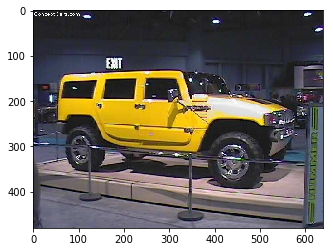

In [11]:
test_image = folder_1 + whole + '0002.jpg'
pil_image = Image.open(test_image)
plt.imshow(pil_image)

In [34]:
def get_prediction(model, img):
    dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
    img = image_loader(img).type(dtype)
    if img.size()[1] != 3:
        return [0, 0]
    with torch.no_grad():
        output = model.forward(img)
    cpu_out = output.cpu()
    return class_index[str(cpu_out.data.numpy().argmax())]

In [18]:
img = folder_1 + whole + '0001.jpg'
get_prediction(incept_eval, img)

['n04252225', 'snowplow']

In [35]:
from tqdm import tqdm
prediction_files_01 = list()
prediction_files_02 = list()

for img_path in tqdm(os.listdir(folder_1 + whole)):
    img = folder_1 + whole + img_path
    prediction_files_01.append(get_prediction(incept_eval, img)[1])
    
for img_path in tqdm(os.listdir(folder_1 + damage)):
    img = folder_1 + damage + img_path
    prediction_files_02.append(get_prediction(incept_eval, img)[1])

100%|██████████| 920/920 [00:16<00:00, 56.45it/s]


In [42]:
from collections import Counter
count1 = Counter(prediction_files_01 + prediction_files_02)

In [44]:
k = count1.most_common()
types_allowed = ['minivan', 'sports_car', 'limousine', 'beach_wagon', 'convertible', 'pickup','racer','cab','car_wheel','jeep',
 'moving_van', 'minibus', 'recreational_vehicle', 'Model_T', 'police_van', 'golfcart', 'tank', 'forklift', 'streetcar', 'ambulance', 'garbage_truck']
 

In [45]:
print("Number of Classes: ",len(types_allowed))

Number of Classes:  21


In [47]:
the_count = 0
for the_number in k:
    if the_number[0] in types_allowed:
        the_count += the_number[1]

In [48]:
the_count

1480

In [49]:
len(os.listdir(folder_1 + damage)) + len(os.listdir(folder_1 + whole))

1840

In [52]:
image_loader(img).shape

torch.Size([1, 3, 224, 224])